# Newton's Method on Marks Data

### Importing Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('marks.csv', index_col=0)
df = shuffle(df)
df.head()

,marks1,marks2,selected
90,52.348004,60.769505,0
41,83.902394,56.308046,1
7,61.106665,96.511426,1
50,91.564975,88.696293,1
98,99.315009,68.775409,1


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 90 to 87
Data columns (total 3 columns):
marks1      100 non-null float64
marks2      100 non-null float64
selected    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [4]:
Y = df['selected']
X = df.drop(['selected'],axis=1)

In [5]:
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


### Data Preprocessing

In [6]:
Y = (np.array(Y)).reshape(Y.shape[0],1)
print(Y.shape)
X = np.array(X)

#Normalising Inputs(2D input)
def normalise(inp):
    return np.array((inp-inp.mean())/inp.std())
X = normalise(X)

X = np.hstack((np.ones((X.shape[0],1)),X))
print(X.shape)
print(X[:5])

(100, 1)
(100, 3)
[[ 1.         -0.71756088 -0.27274077]
 [ 1.          0.94912851 -0.50839314]
 [ 1.         -0.25493217  1.61513221]
 [ 1.          1.35386276  1.2023402 ]
 [ 1.          1.76321626  0.15012767]]


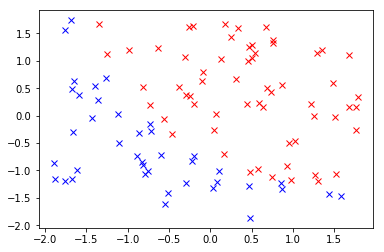

In [7]:
for i in range(X.shape[0]):
    if Y[i]==1:
        plt.plot(X[i,1],X[i,2],'rx')
    else:
        plt.plot(X[i,1],X[i,2],'bx')
plt.show()

In [8]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70, 3) (70, 1)
(30, 3) (30, 1)


### Defining functions

In [9]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-x))

In [10]:
# Cost Function with Regularization
def cost(X, Y, theta, _lambda=0.1):
    m = len(Y)
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)
    return (1 / m) * (-Y.T.dot(np.log(h)) - (1 - Y).T.dot(np.log(1 - h))) + reg

In [11]:
# Regularized gradient function
def gradient(X, Y, theta, _lambda = 0.1):
    m, n = X.shape
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m
    return ((1 / m) * X.T.dot(h - Y)) + reg

In [12]:
# Regularised Hessian function
# Hessian = (X.T)DX
def hessian(X, Y, theta, _lambda=0.1):
    D = np.zeros((X.shape[0],X.shape[0]))
    for i in range(X.shape[0]):
        D[i][i] = sigmoid(X[i].dot(theta)) * (1 - sigmoid(X[i].dot(theta)))
    h1 = np.dot(np.dot(np.transpose(X), D), X)
    
    h2 = np.zeros((X.shape[1],X.shape[1]))
    for i in range(1, X.shape[1]) :
        h2[i][i] = _lambda
    return h1 + h2    

In [13]:
# Training using newton's method
def train(X, Y, iterations = 100, _lambda=0.1):
    costs = np.empty([iterations])
    i = 0
    m = X.shape[0]
    theta = np.random.randn(X.shape[1],1)

    while i < iterations:
        costs[i] = cost(X, Y, theta, _lambda)
        
        g = gradient(X,Y,theta,_lambda)
        hess = hessian(X,Y,theta,_lambda)
        h_inv = np.linalg.inv(hess)
        
        theta = theta - np.dot(h_inv,g)
        i = i + 1
    return theta, costs

In [14]:
def test(X, Y, theta):
    pred = sigmoid(X.dot(theta))
    counts = 0
    a, b = X.shape
    Y_pred = np.empty([Y.shape[0]])
    for i in range(a):
        if pred[i] > 0.5:
            Y_pred[i] = 1
            if int(Y[i]) == 1:
                counts = counts + 1
        else:
            Y_pred[i] = 0
            if int(Y[i]) == 0 :
                counts = counts + 1
        
    print('Accuracy:',counts/a * 100)
    
    Y_pred = Y_pred.reshape(Y.shape[0],1)
    return Y_pred

### Training with Regularization (lambda = 0.1)

In [15]:
theta, costs = train(X_train, y_train, _lambda=0.1)
print(theta)

[[0.63292359]
 [1.71286238]
 [1.14186915]]


In [16]:
y_pred_test = test(X_test,y_test,theta)

Accuracy: 96.66666666666667


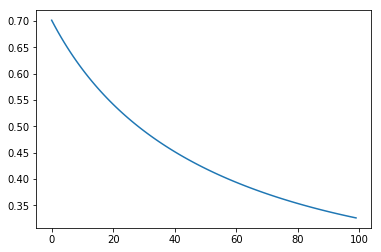

In [17]:
plt.plot(range(len(costs)),costs)

In [18]:
y_pred_train = test(X_train,y_train,theta)

Accuracy: 88.57142857142857


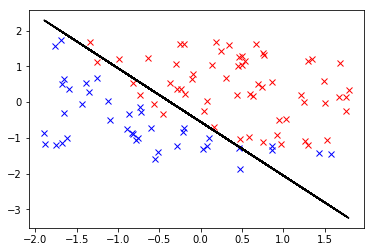

In [19]:
# plotting decision boundary

for i in range(X.shape[0]):
    if Y[i]==1:
        plt.plot(X[i,1],X[i,2],'rx')
    else:
        plt.plot(X[i,1],X[i,2],'bx')
        
decision_x_vals = X[: , 1]
decision_y_vals = -1.0 * ((theta[0] + theta[1] * decision_x_vals) / (theta[2]))

plt.plot(decision_x_vals, decision_y_vals, 'k')
plt.show()

In [23]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(Y_pred,Y):
    cm = confusion_matrix(Y_pred, Y, labels=None, sample_weight=None)
    
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sns.set(font_scale = 1.4) #for label size
    ax = sns.heatmap(df_cm, annot = True, annot_kws = {"size": 16})
    ax.set_title("Confusion Matrix")
    ax.set(xlabel = 'Predicted Class', ylabel = 'Actual Class')
    plt.show()
    return cm

Accuracy: 90.0


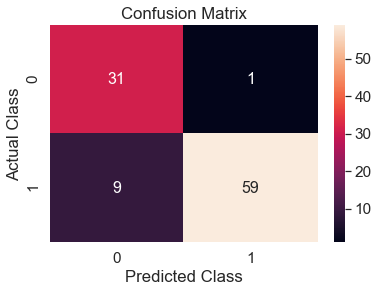

In [24]:
# Confusion matrix on complete data
cm = plot_confusion_matrix(test(X,Y,theta),Y)

In [25]:
# Calcuating precision, recall and F1 score
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision:", precision * 100)
print("Recall:", recall * 100)

F1_score = (2 * precision * recall) / (precision + recall)
print("F1 score:", F1_score)

Precision: 98.33333333333333
Recall: 86.76470588235294
F1 score: 0.9218749999999999
